In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import permutation_importance
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull



In [2]:
#Process data
%run data_handler.ipynb

       var-1     var-2     var-3     var-4        yield  source
15  0.224189  0.846480  0.879484  0.878516  1088.859618    file
20  0.183674  0.857143  0.816327  0.877551   872.307487  week-1
21  0.272727  0.848484  0.848485  0.818182   743.118248  week-2
18  0.119879  0.862540  0.643331  0.849804   431.612757    file
14  0.438933  0.774092  0.378167  0.933696   355.806818    file
..       ...       ...       ...       ...          ...     ...
1   0.758653  0.536518  0.656000  0.360342    18.301380    file
19  0.126885  0.153430  0.770162  0.190518     9.972332    file
8   0.153786  0.729382  0.422598  0.443074     8.847992    file
3   0.706051  0.534192  0.264243  0.482088     4.210898    file
2   0.438350  0.804340  0.210245  0.151295     0.112940    file

[22 rows x 6 columns]


In [3]:
X = inputs
y = outputs

# Initialize result collection
query_results = []

In [4]:
%run ../common_functions.ipynb

In [5]:
n_features = X.shape[1]
print("Number of features: ", n_features)

# Step 1: Fit GP with fixed kernel for importance estimation
#base_kernel = RBF(length_scale=0.1, length_scale_bounds='fixed')
base_kernel = RBF(length_scale=0.1, length_scale_bounds=(1e-6, 1e2))
#base_kernel = RBF(length_scale=0.1, length_scale_bounds='fixed')
gp_temp = GaussianProcessRegressor(kernel=base_kernel, alpha=1e-10)
gp_temp.fit(X, y)

# Step 2: Compute permutation importance
result = permutation_importance(gp_temp, X, y, n_repeats=10, random_state=42)
importances = result.importances_mean
print("Permutation importance:", importances)

# Step 3: Convert importance to length scales (inverse relationship)
length_scales = 1.0 / (importances + 1e-6)
print("Adjusted length scales:", length_scales)

# Step 4: Build new kernel with adjusted scales
adjusted_kernel = RBF(length_scale=length_scales)
adjusted_kernel = None

Number of features:  4
Permutation importance: [0.82459244 0.91640269 0.83873985 1.00131044]
Adjusted length scales: [1.21271884 1.09122215 1.19226338 0.99869028]


In [6]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.01, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.1, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.21333223 0.84929592 0.88491026 0.88866065]


In [7]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.05, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.05, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.21333223 0.83385351 0.88491026 0.88866065]


In [8]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.1, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.1, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.2271503  0.84929592 0.88491026 0.90501387]


In [9]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=1.0, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 1.0, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.19951416 0.83385351 0.89984299 0.87230744]


In [10]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=2.0, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 2.0, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.2271503  0.78752626 0.86997754 0.90501387]


In [11]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=3.0, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 3.0, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.25478645 0.80296867 0.85504482 0.9377203 ]


In [12]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.1, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.1, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.21333223 0.80296867 0.88491026 0.88866065]


In [13]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.05, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.05, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.21333223 0.80296867 0.88491026 0.88866065]


In [14]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.1, grid_size=200, dimension=X.shape[1] - 1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
print("ACQ:", len(acq_vals))
print("Score:", score)
log_query_candidate('EI', 0.1, next_point,score)

Number of features:  4
Dimension of input space: 4
Each axis has 200 points before downsampling
Each axis has 67 points after downsampling
Function will evaluate across: 20151121 points
Known data volume: 0.0871362853728229
Grid volume: 1.0088630636421168
Coverage ratio of known data to grid volume: 0.0863707756910541
Mean  20151121
Std   20151121
Next query point: [0.21333223 0.80296867 0.88491026 0.88866065]
ACQ: 20151121
Score: 0.049325349888756184


In [15]:
find_best_candidate(query_results)
print(type(query_results))

Total number of points to evaluate: 9
{'method': 'PI', 'xi': 0.1, 'kappa': None, 'x': array([0.21333223, 0.84929592, 0.88491026, 0.88866065]), 'score': 0.5020880252766511, 'dim': 4}
{'method': 'PI', 'xi': 0.05, 'kappa': None, 'x': array([0.21333223, 0.83385351, 0.88491026, 0.88866065]), 'score': 0.3565980889429162, 'dim': 4}
{'method': 'PI', 'xi': 0.1, 'kappa': None, 'x': array([0.2271503 , 0.84929592, 0.88491026, 0.90501387]), 'score': 0.25745290790086334, 'dim': 4}
{'method': 'UCB', 'xi': None, 'kappa': 1.0, 'x': array([0.19951416, 0.83385351, 0.89984299, 0.87230744]), 'score': 3.107146574693917, 'dim': 4}
{'method': 'UCB', 'xi': None, 'kappa': 2.0, 'x': array([0.2271503 , 0.78752626, 0.86997754, 0.90501387]), 'score': 3.558995123055802, 'dim': 4}
{'method': 'UCB', 'xi': None, 'kappa': 3.0, 'x': array([0.25478645, 0.80296867, 0.85504482, 0.9377203 ]), 'score': 4.203965299795746, 'dim': 4}
{'method': 'EI', 'xi': 0.1, 'kappa': None, 'x': array([0.21333223, 0.80296867, 0.88491026, 0.888

In [16]:
#add points to dataframe
add_points_to_df(df_sorted, query_results)
pd.set_option('display.max_rows', None)
print(df_sorted)

       var-1     var-2     var-3     var-4        yield  source
15  0.224189  0.846480  0.879484  0.878516  1088.859618    file
20  0.183674  0.857143  0.816327  0.877551   872.307487  week-1
21  0.272727  0.848484  0.848485  0.818182   743.118248  week-2
18  0.119879  0.862540  0.643331  0.849804   431.612757    file
14  0.438933  0.774092  0.378167  0.933696   355.806818    file
4   0.836478  0.193610  0.663893  0.785649   258.370525    file
9   0.463442  0.630025  0.107906  0.957644   233.223610    file
7   0.352356  0.322242  0.116979  0.473113   109.571876    file
13  0.511142  0.817957  0.728710  0.112354    79.729130    file
5   0.683432  0.118663  0.829046  0.567577    78.434389    file
0   0.191447  0.038193  0.607418  0.414584    64.443440    file
11  0.583973  0.147243  0.348097  0.428615    64.420147    file
12  0.306889  0.316878  0.622634  0.095399    63.476716    file
6   0.553621  0.667350  0.323806  0.814870    57.571537    file
17  0.355482  0.639619  0.417618  0.1226

/var/folders/d6/s3jc1rb17y1411yjy8r6jlf80000gn/T/ipykernel_25500/923837372.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(other_cols))


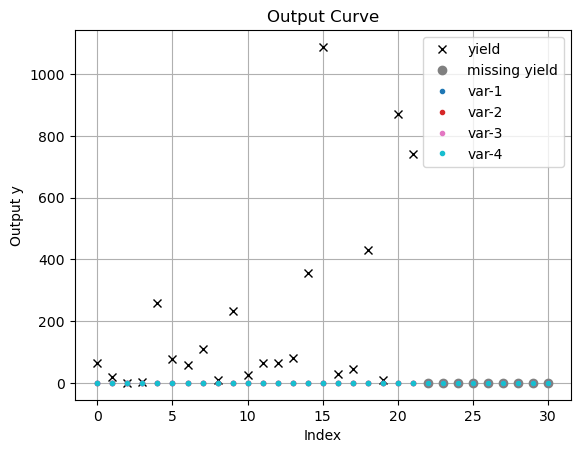

In [17]:
plot_output_points(df_sorted)